# Nombre: Mateo Serrato Ascencio, IBERO LEÓN
# Práctica BoW


In [71]:
def get_text_from_files(path_corpus, path_truth):
    tr_text = [] #aqui van los tuits
    tr_labels = [] #aqui van las etiquetas

    with open(path_corpus, 'r', encoding='utf-8') as f_corpus, open(path_truth, 'r', encoding='utf-8') as f_truth:

        for twitt in f_corpus:
            tr_text += [twitt]

        for label in f_truth:
            tr_labels += [label]

    return tr_text, tr_labels


         

In [72]:
tr_text, tr_labels = get_text_from_files('./mex20_train.txt','mex20_train_labels.txt' )

### VER LOS DATOS
#### Saber si es un problema balanceado o desbalanceado

Counter({'0\n': 3759, '1\n': 1519})


Text(0.5, 0, 'Etiqueta')

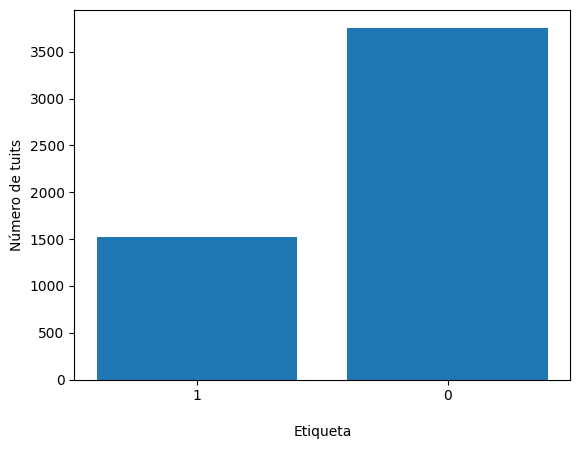

In [73]:
from collections import Counter
import matplotlib.pyplot as plt

print(Counter(tr_labels))
plt.bar(Counter(tr_labels).keys(), Counter(tr_labels).values())
plt.ylabel('Número de tuits')
plt.xlabel('Etiqueta')



In [74]:
import nltk
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
tokenizer.tokenize(tr_text[61])




['🤣',
 '🤣',
 '🤣',
 'mi',
 'vida',
 ',',
 'eres',
 'la',
 'mejor',
 '!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados',
 '!',
 'Block',
 'y',
 'be',
 'happy',
 '!',
 '😘']

In [75]:
import nltk 

corpus_palabras = []

for tweet in tr_text:
    corpus_palabras+= tokenizer.tokenize(tweet)




In [76]:
len(set(corpus_palabras))


15194

In [77]:

fdist = nltk.FreqDist(corpus_palabras)
fdist

FreqDist({',': 3016, 'de': 2915, 'que': 2829, '.': 2604, 'la': 2031, 'a': 1956, 'y': 1856, '!': 1435, 'no': 1430, '@USUARIO': 1399, ...})

In [78]:
len(fdist)


15194

In [79]:
import numpy as np
def sort_freq(fdist):
    aux = [(fdist[key], key) for key in fdist]
    aux.sort(reverse=True) 
    return aux




In [80]:
V = sort_freq(fdist)
V[:10000]  #las 10000 palabras más frecuentes

[(3016, ','),
 (2915, 'de'),
 (2829, 'que'),
 (2604, '.'),
 (2031, 'la'),
 (1956, 'a'),
 (1856, 'y'),
 (1435, '!'),
 (1430, 'no'),
 (1399, '@USUARIO'),
 (1198, 'me'),
 (1043, 'el'),
 (1018, 'en'),
 (851, 'se'),
 (736, 'es'),
 (706, 'con'),
 (704, '?'),
 (691, 'verga'),
 (683, 'los'),
 (665, 'madre'),
 (612, 'por'),
 (601, 'las'),
 (590, '"'),
 (582, 'un'),
 (550, 'te'),
 (547, 'mi'),
 (509, 'lo'),
 (493, 'putas'),
 (472, 'una'),
 (464, '...'),
 (462, 'putos'),
 (458, 'para'),
 (434, '😂'),
 (422, 'si'),
 (420, 'ya'),
 (416, 'como'),
 (403, 'su'),
 (377, 'pero'),
 (365, 'tu'),
 (357, 'loca'),
 (350, 'le'),
 (325, 'más'),
 (318, 'No'),
 (298, 'del'),
 (294, 'gorda'),
 (284, 'al'),
 (252, 'bien'),
 (249, 'A'),
 (243, '¿'),
 (242, 'Y'),
 (229, 'son'),
 (229, 'Me'),
 (227, 'o'),
 (225, 'feas'),
 (225, 'cuando'),
 (214, 'Que'),
 (208, ':'),
 (205, 'yo'),
 (199, 'les'),
 (196, 'porque'),
 (191, 'ni'),
 (191, 'está'),
 (189, 'ser'),
 (184, 'estoy'),
 (181, 'sus'),
 (172, 'todos'),
 (169, 'esta'

In [81]:
#Asegurar un orden en diccionario en Python
dict_indices = dict()

cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1


In [82]:
import numpy as np


def build_bow_tr(tr_text,V, dict_indices):
    tokenizer = TweetTokenizer()
    
    # Crear matriz vacía
    M = np.zeros((len(tr_text), len(V)), dtype=int)
    
    # Recorremos cada tweet
    
    for i, tr in enumerate(tr_text):
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr.lower()))
        for word in fdist_doc:
            if word in dict_indices:  #Si la palabra está en el vocabulario
                M[i, dict_indices[word]] = 1
        
    

    return M



build_bow_tr(tr_text, V, dict_indices)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], shape=(5278, 15194))

In [83]:
BOW_tr = build_bow_tr(tr_text, V, dict_indices)

In [84]:
BOW_tr.shape

(5278, 15194)

In [85]:

val_text, val_labels = get_text_from_files('./mex20_val.txt','mex20_val_labels.txt' )

BOW_val = build_bow_tr(val_text, V, dict_indices)
#prueba



Counter({0: 418, 1: 169})


Text(0.5, 0, 'Etiqueta')

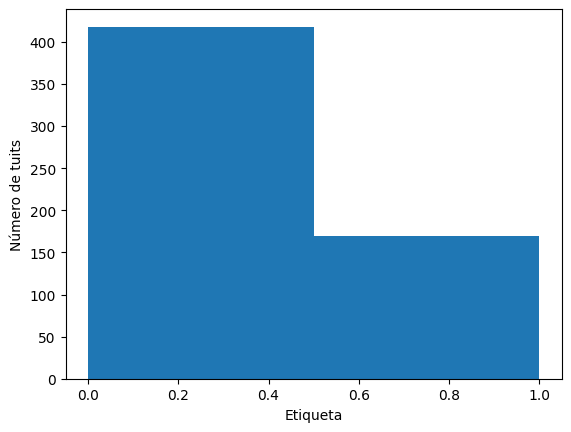

In [86]:
val_labels = list(map(int, val_labels))
from collections import Counter
print(Counter(val_labels))
plt.hist(val_labels, bins = len(set(val_labels)))
plt.ylabel('Número de tuits')
plt.xlabel('Etiqueta')

In [87]:
BOW_val = build_bow_tr(val_text, V, dict_indices)


In [ ]:
tr_labels = list(map(int, tr_labels))
#Clasificación 
tr_labels = list(map(int, tr_labels))
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_fscore_support, classification_report

parameters = {'C': [0.5, .12, .25, .5,1,2,4]}
svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator = svr, param_grid=parameters, scoring='f1_macro', n_jobs=12, cv=5)
grid.fit(BOW_tr, tr_labels)

y_pred = grid.predict(BOW_val)
p,r,f,_ = precision_recall_fscore_support(val_labels, y_pred, average='macro',pos_label=1)
print(confusion_matrix(val_labels, y_pred))
print(classification_report(val_labels, y_pred))

# Comentarios:

"""
El modelo tiene un buen desempeño en la clasificación de los tuits en las diferentes categorías, no obstante,
podemos observar que tenemos un desbalance en las clases, lo que puede afectar el desempeño del modelo en la clase
menoritaria. Yo sugeriría recolectar más datos de la clase minoritaria para balancear el dataset y mejorar el desempeño
del modelo. Aún así, el modelo logra una precisión, recall y f1-score bastante aceptables para dicho desbalance en la clase 1

Y hablando del metodo de Bolsa de palabras, me parece sencillo de implementar y entender, me gustó el resultado que dió en la
matriz de confusión, Gracias Profe por el ejercicio, me ayudó a entender mejor este método
"""

[[366  52]
 [ 47 122]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       418
           1       0.70      0.72      0.71       169

    accuracy                           0.83       587
   macro avg       0.79      0.80      0.80       587
weighted avg       0.83      0.83      0.83       587



'\nEl modelo tiene un buen desempeño en la clasificación de los tuits en las diferentes categorías, no obstante,\npodemos observar que tenemos un desbalance en las clases, lo que puede afectar el desempeño del modelo en la clase\nmenoritaria. Yo sugeriría recolectar más datos de la clase minoritaria para balancear el dataset y mejorar el desempeño\ndel modelo. Aún así, el modelo logra una precisión, recall y f1-score bastante aceptables para dicho desbalance en la clase 0.\n'